# RNN
* [source site](https://www.tensorflow.org/beta/tutorials/text/text_classification_rnn)

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt

In [28]:
# create a helper function to plot

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

In [3]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

W0629 14:41:33.301954 140239441286976 deprecation.py:323] From /home/hyunsu/anaconda3/envs/tf20_py36/lib/python3.6/site-packages/tensorflow_datasets/core/file_format_adapter.py:247: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /home/hyunsu/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


In [15]:
tokenizer = info.features['text'].encoder

In [16]:
tokenizer

<SubwordTextEncoder vocab_size=8185>

In [17]:
print ('Vocabulary size: {}'.format(tokenizer.vocab_size))

Vocabulary size: 8185


In [18]:
sample_string = 'TensorFlow is cool.'

tokenized_string = tokenizer.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print ('The original string: {}'.format(original_string))

assert original_string == sample_string

Tokenized string is [6307, 2327, 4043, 4265, 9, 2724, 7975]
The original string: TensorFlow is cool.


In [19]:
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
4265 ----> ow 
9 ----> is 
2724 ----> cool
7975 ----> .


In [20]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [21]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)

test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

In [22]:
train_dataset

<PaddedBatchDataset shapes: ((None, None), (None,)), types: (tf.int64, tf.int64)>

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64), # project word into 64-dimensional space
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)), # build RNN with LSTM
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [24]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [25]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset)

Epoch 1/10


W0629 14:47:02.105192 140239441286976 deprecation.py:323] From /home/hyunsu/anaconda3/envs/tf20_py36/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


391/391 [==============================] - 218s 558ms/step - loss: 0.5919 - accuracy: 0.6866 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 78s 201ms/step - loss: 0.5167 - accuracy: 0.7359 - val_loss: 0.4915 - val_accuracy: 0.7738
Epoch 3/10
391/391 [==============================] - 59s 150ms/step - loss: 0.3314 - accuracy: 0.8642 - val_loss: 0.3820 - val_accuracy: 0.8415
Epoch 4/10
391/391 [==============================] - 54s 139ms/step - loss: 0.2581 - accuracy: 0.8996 - val_loss: 0.3909 - val_accuracy: 0.8318
Epoch 5/10
391/391 [==============================] - 49s 125ms/step - loss: 0.2979 - accuracy: 0.8758 - val_loss: 0.4155 - val_accuracy: 0.8320
Epoch 6/10
391/391 [==============================] - 44s 113ms/step - loss: 0.1862 - accuracy: 0.9314 - val_loss: 0.4750 - val_accuracy: 0.8392
Epoch 7/10
391/391 [==============================] - 43s 110ms/step - loss: 0.1436 - accuracy: 0.9498 - val_loss: 0.4939 - val_accu

In [26]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

    391/Unknown - 10s 25ms/step - loss: 0.7185 - accuracy: 0.7820Test Loss: 0.7184659781510873
Test Accuracy: 0.782039999961853


In [29]:
def pad_to_size(vec, size):
    zeros = [0] * (size - len(vec))
    vec.extend(zeros)
    return vec

In [40]:
def sample_predict(sentence, pad):
    tokenized_sample_pred_text = tokenizer.encode(sentence)

    if pad:
        tokenized_sample_pred_text = pad_to_size(tokenized_sample_pred_text, 64)

    predictions = model.predict(tf.expand_dims(tokenized_sample_pred_text, 0))

    return (predictions)

In [41]:
sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print (predictions)

[[0.7519284]]


In [42]:
# predict on a sample text with padding

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print (predictions)
# note that increase the predict probability, slightly.

[[0.75264233]]


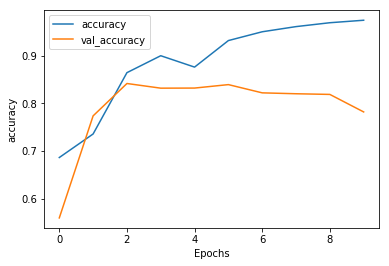

In [43]:
plot_graphs(history, 'accuracy')

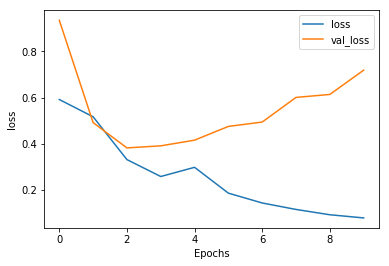

In [44]:
plot_graphs(history, 'loss')

In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
        64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [48]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 406s 1s/step - loss: 0.5140 - accuracy: 0.7408 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 153s 391ms/step - loss: 0.4445 - accuracy: 0.7983 - val_loss: 0.4768 - val_accuracy: 0.7918
Epoch 3/10
391/391 [==============================] - 113s 290ms/step - loss: 0.3393 - accuracy: 0.8623 - val_loss: 0.4344 - val_accuracy: 0.8258
Epoch 4/10
391/391 [==============================] - 99s 254ms/step - loss: 0.2594 - accuracy: 0.9034 - val_loss: 0.4270 - val_accuracy: 0.8269
Epoch 5/10
391/391 [==============================] - 94s 241ms/step - loss: 0.2129 - accuracy: 0.9233 - val_loss: 0.4500 - val_accuracy: 0.8367
Epoch 6/10
391/391 [==============================] - 96s 246ms/step - loss: 0.1692 - accuracy: 0.9399 - val_loss: 0.4892 - val_accuracy: 0.8038
Epoch 7/10
391/391 [==============================] - 89s 228ms/step - loss: 0.1923 - accuracy: 0.9300 - val_loss: 0.5443 

In [49]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

    391/Unknown - 21s 53ms/step - loss: 0.6588 - accuracy: 0.7954Test Loss: 0.6587901679451204
Test Accuracy: 0.7953600287437439


In [50]:
# predict on a sample text without padding.

sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print (predictions)

[[0.05900707]]


In [51]:
# predict on a sample text with padding

sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print (predictions)

[[0.05345647]]


In [52]:
sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print (predictions)

[[0.17231531]]


In [53]:
# predict on a sample text with padding

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print (predictions)
# note that without padding prediction probability is low relative to 1 LSTM model.

[[0.8625002]]


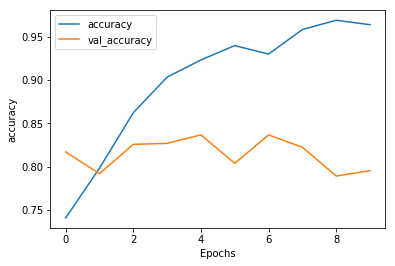

In [54]:
plot_graphs(history, 'accuracy')

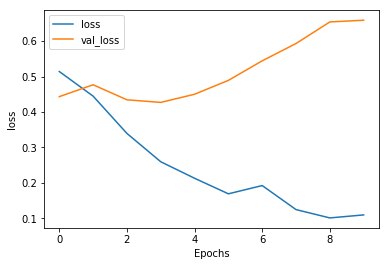

In [55]:
plot_graphs(history, 'loss')